In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [37]:
df = pd.read_csv('https://raw.githubusercontent.com/kelvin2401/fpdatmin/main/Reviews2.csv')

In [38]:
df.dtypes

Score       int64
Summary    object
dtype: object

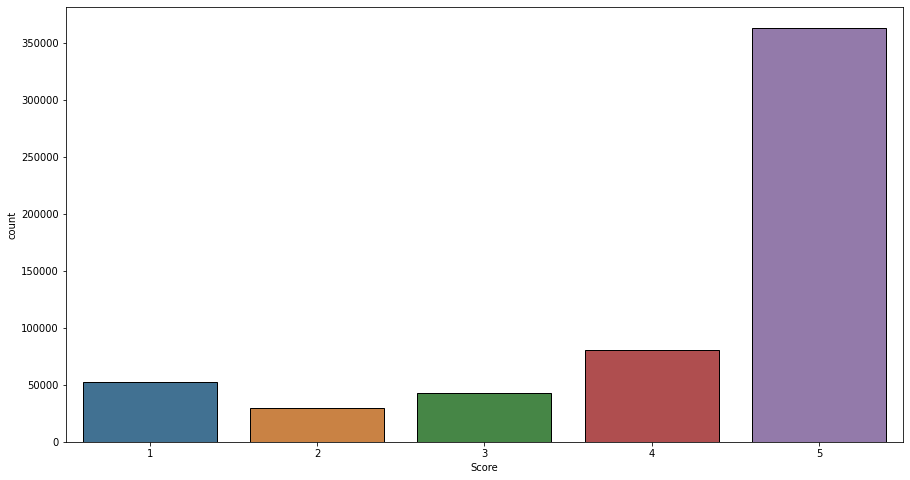

In [39]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df['Score'], edgecolor='black', saturation=0.55)
plt.show()

In [40]:
df.isnull().sum()

Score       0
Summary    27
dtype: int64

In [41]:
df = df.dropna()

In [42]:
df = df.sample(n=10000)

In [43]:
df['Summary'] = df['Summary'].astype(str)

In [44]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import string
def text_cleaning(text):
    '''
    Make text lowercase, remove text in square brackets,remove links,remove special characters
    and remove words containing numbers.
    '''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text

In [45]:
df['Summary']=df['Summary'].apply(text_cleaning)

In [46]:
df

,Score,Summary
14598,4,tastes a little grind y
100169,5,i searched high and low until i found mrs gra...
394005,5,excellent
566014,5,one of the best protein bars
67816,4,i like them
...,...,...
485387,5,favorite
279384,3,chai low carb
457642,5,great taste fast shipping excellent seller
19525,5,all of our dogs love this


In [47]:
y=df['Score']
x=df['Summary']

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
count_vect = CountVectorizer(ngram_range=(1,2),stop_words='english')
X_train_counts = count_vect.fit_transform(x_train) 
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_new_counts = count_vect.transform(x_test)
X_test_tfidf = tfidf_transformer.transform(X_new_counts)
lr=LogisticRegression(max_iter=100000)

In [55]:
from sklearn.metrics import accuracy_score
lr.fit(X_train_tfidf,y_train)
pred_1=lr.predict(X_test_tfidf)

In [56]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           1       0.61      0.23      0.34       168
           2       0.44      0.10      0.17       106
           3       0.67      0.12      0.21       129
           4       0.34      0.08      0.12       279
           5       0.71      0.98      0.82      1318

    accuracy                           0.69      2000
   macro avg       0.55      0.30      0.33      2000
weighted avg       0.63      0.69      0.61      2000

Confusion matrix, without normalization
[[  39    6    4    4  115]
 [  13   11    3    6   73]
 [   4    5   16   10   94]
 [   1    1    1   21  255]
 [   7    2    0   20 1289]]


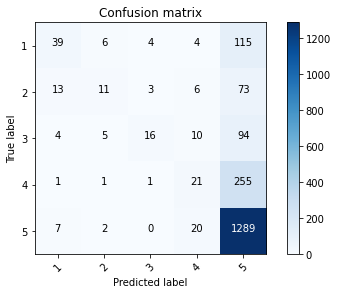

In [57]:
from sklearn.metrics import classification_report, confusion_matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_1, labels=[1,2,3,4,5])
np.set_printoptions(precision=2)

print (classification_report(y_test, pred_1))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','2','3','4','5'],normalize= False,  title='Confusion matrix')

In [59]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_tfidf , y_train)
 
#Predict on test data
pred_mulnb = naive_bayes.predict(X_test_tfidf)

              precision    recall  f1-score   support

           1       0.92      0.07      0.12       168
           2       0.40      0.04      0.07       106
           3       0.67      0.05      0.09       129
           4       1.00      0.01      0.02       279
           5       0.67      1.00      0.80      1318

    accuracy                           0.67      2000
   macro avg       0.73      0.23      0.22      2000
weighted avg       0.72      0.67      0.55      2000

Confusion matrix, without normalization
[[  11    5    1    0  151]
 [   1    4    2    0   99]
 [   0    1    6    0  122]
 [   0    0    0    3  276]
 [   0    0    0    0 1318]]


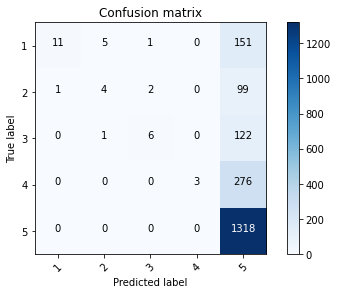

In [60]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_mulnb, labels=[1,2,3,4,5])
np.set_printoptions(precision=2)

print (classification_report(y_test, pred_mulnb))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','2','3','4','5'],normalize= False,  title='Confusion matrix')

In [63]:
from sklearn.naive_bayes import BernoulliNB
naive_bayes_bernoulli = BernoulliNB()
naive_bayes_bernoulli.fit(X_train_tfidf , y_train)
 
#Predict on test data
pred_bernb = naive_bayes_bernoulli.predict(X_test_tfidf)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       168
           2       0.00      0.00      0.00       106
           3       0.00      0.00      0.00       129
           4       1.00      0.00      0.01       279
           5       0.66      1.00      0.79      1318

    accuracy                           0.66      2000
   macro avg       0.33      0.20      0.16      2000
weighted avg       0.57      0.66      0.52      2000

Confusion matrix, without normalization
[[   0    0    0    0  168]
 [   0    0    0    0  106]
 [   0    0    0    0  129]
 [   0    0    0    1  278]
 [   0    0    0    0 1318]]


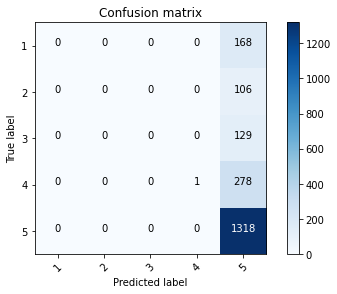

In [64]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_bernb, labels=[1,2,3,4,5])
np.set_printoptions(precision=2)

print (classification_report(y_test, pred_bernb))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','2','3','4','5'],normalize= False,  title='Confusion matrix')

In [67]:
from sklearn import svm
from sklearn.svm import SVC
clf = svm.SVC(kernel='rbf')
clf.fit(X_train_tfidf, y_train) 
predSVM = clf.predict(X_test_tfidf)

              precision    recall  f1-score   support

           1       0.57      0.23      0.33       168
           2       0.42      0.12      0.19       106
           3       0.57      0.13      0.21       129
           4       0.48      0.08      0.13       279
           5       0.71      0.98      0.82      1318

    accuracy                           0.69      2000
   macro avg       0.55      0.31      0.34      2000
weighted avg       0.64      0.69      0.61      2000

Confusion matrix, without normalization
[[  39    8    5    1  115]
 [  16   13    5    2   70]
 [   3    4   17    5  100]
 [   1    3    1   21  253]
 [   9    3    2   15 1289]]


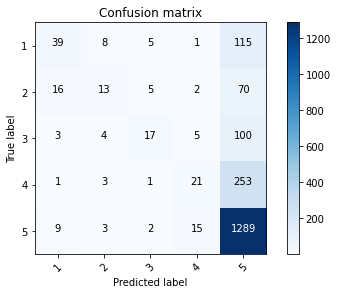

In [68]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predSVM, labels=[1,2,3,4,5])
np.set_printoptions(precision=2)

print (classification_report(y_test, predSVM))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','2','3','4','5'],normalize= False,  title='Confusion matrix')

In [70]:
clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train_tfidf, y_train) 
predSVM2 = clf2.predict(X_test_tfidf)

              precision    recall  f1-score   support

           1       0.55      0.33      0.42       168
           2       0.31      0.13      0.19       106
           3       0.56      0.16      0.24       129
           4       0.36      0.10      0.16       279
           5       0.73      0.96      0.83      1318

    accuracy                           0.69      2000
   macro avg       0.50      0.34      0.37      2000
weighted avg       0.63      0.69      0.63      2000

Confusion matrix, without normalization
[[  56   11    5    6   90]
 [  19   14    6    5   62]
 [   8    8   20   10   83]
 [   7    6    2   28  236]
 [  11    6    3   28 1270]]


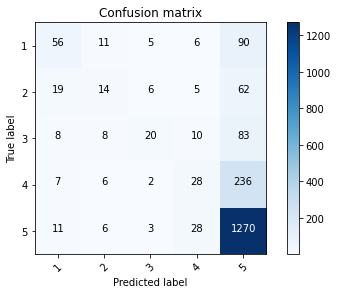

In [71]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predSVM2, labels=[1,2,3,4,5])
np.set_printoptions(precision=2)

print (classification_report(y_test, predSVM2))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','2','3','4','5'],normalize= False,  title='Confusion matrix')

In [72]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(64, ), activation='relu',max_iter=1000, epsilon=1e-08)
mlp.fit(X_train_tfidf, y_train)
predANN = mlp.predict(X_test_tfidf)

              precision    recall  f1-score   support

           1       0.41      0.33      0.36       168
           2       0.22      0.19      0.20       106
           3       0.25      0.20      0.22       129
           4       0.25      0.24      0.24       279
           5       0.77      0.82      0.79      1318

    accuracy                           0.62      2000
   macro avg       0.38      0.36      0.37      2000
weighted avg       0.60      0.62      0.61      2000

Confusion matrix, without normalization
[[  55   20   18   15   60]
 [  22   20   11   10   43]
 [  12   14   26   27   50]
 [  13   11   16   66  173]
 [  32   26   35  143 1082]]


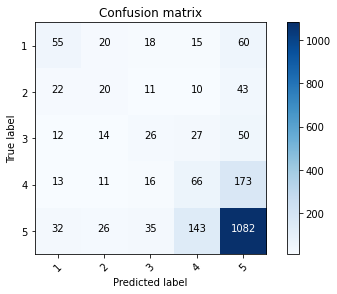

In [73]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predANN, labels=[1,2,3,4,5])
np.set_printoptions(precision=2)

print (classification_report(y_test, predANN))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','2','3','4','5'],normalize= False,  title='Confusion matrix')

In [77]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42, max_samples = 1000)
rf.fit(X_train_tfidf, y_train);

In [80]:
predrf = rf.predict(X_test_tfidf)

In [84]:
# Calculate the absolute errors
errors = abs(predrf - y_test)
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 64.9 %.
